<h1 align="center"> 
  Air Quality
</h1>

<h4 align="center">
    <img alt="AirQuality" title="#AirQuality" src="https://www.healthissuesindia.com/wp-content/uploads/2020/02/81287396_l-2048x1365.jpg" width="400px;" />
</h4>

## 🔍 About

The following program intends to predict air quality based on the amount of carbon monoxide. This problem purpose by professor Diego Furtado in the discipline of Machine Learning aims to solve a known problem using linear regression methods. In sequence, we'll analyze some approaches to tackle this problem by predicting the quantity of carbon dioxide in the air.

In this [link](https://archive.ics.uci.edu/ml/datasets/Air+Quality), you can locate the dataset that was used. We also made a jupyter notebook available for a better comprehension of the topic.

### Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Reading and parsing data

In [2]:
# Reading .csv
air_quality = pd.read_csv(os.path.join('data', 'AirQualityUCI.csv'), delimiter=';')

# Removing 2 last columns that does not exist. Removing last 114 lines (does not cantain data).
air_quality = air_quality.iloc[:9356, :-2]

# Converting date of type 'string' to 'Timestamp'
air_quality['Date'] = pd.to_datetime(arg=air_quality['Date'])
# Parsing dates into 2 new columns, day | month. Year is not really necessary
air_quality['Day'] = air_quality['Date'].dt.day
air_quality['Month'] = air_quality['Date'].dt.month

print(air_quality)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18.00.00     2.6       1360.0     150.0      11.9   
1    2004-10-03  19.00.00     2.0       1292.0     112.0       9.4   
2    2004-10-03  20.00.00     2.2       1402.0      88.0       9.0   
3    2004-10-03  21.00.00     2.2       1376.0      80.0       9.2   
4    2004-10-03  22.00.00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
9351 2005-04-04  09.00.00     3.9       1297.0    -200.0      13.6   
9352 2005-04-04  10.00.00     3.1       1314.0    -200.0      13.5   
9353 2005-04-04  11.00.00     2.4       1163.0    -200.0      11.4   
9354 2005-04-04  12.00.00     2.4       1142.0    -200.0      12.4   
9355 2005-04-04  13.00.00     2.1       1003.0    -200.0       9.5   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0  

### Check missing values for each feature
> Some values are missing, which was overfitting our model, since we don't have enough data to perform a robust model.

In [3]:
# Performing a imputation (not working yet)
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(air_quality['PT08.S1(CO)'])

# Dropping rows that contains missing data...
# Note that if e delete the rows, we can observe that the amount of observations falls from 9356 to 827, 
#  losing 91% of data.
air_quality.replace(to_replace=-200, value=np.nan, inplace=True)
air_quality.dropna(inplace=True)

print(air_quality.shape)

(827, 17)


## Visualizing data

> At first, we need to analize dates and times to see if they have any relations with the concentration of molecules.

> **HEATMAP NOT WORKING**

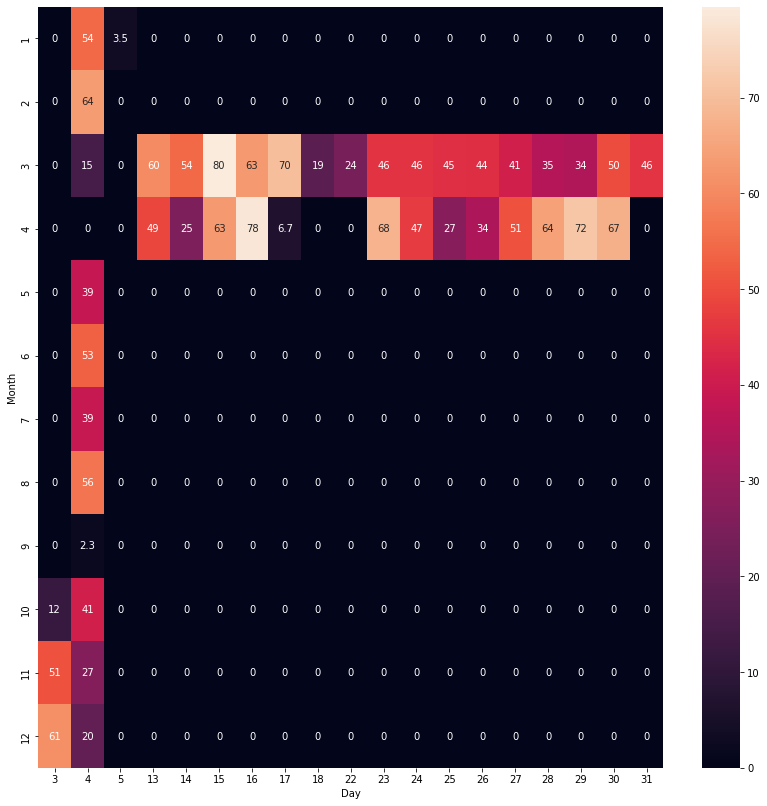

In [22]:
plt.figure(figsize=(14,14))
baloon = air_quality.pivot_table(columns="Day", index="Month", values="CO(GT)", aggfunc="sum").fillna(0)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# baloon = baloon.reindex(months)
sns.heatmap(baloon, annot=True);

### Correlation between all of the features

In [ ]:
# Ploting CO(GT) x all features
# g = sns.PairGrid(air_quality, x_vars=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], 
#                 y_vars='CO(GT)',)
# g.map(sns.scatterplot)

# Ploting all data
g = sns.PairGrid(air_quality, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)

In [ ]:
# Checking correlation between all features
sns.heatmap(air_quality.corr(), annot=True);
# plt.show()

### Selecting feature to be predicted and those that will be used in model

In [ ]:
# Parsing the attributes based on highest correlation (O3, NO2, NHMC). Dropping those that will not be used.
x_air_quality_attributes = air_quality.drop(['CO(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)'], axis=1)
# x_air_quality_attributes = x_air_quality_attributes.apply(pd.to_numeric, errors='coerce')
# x_air_quality_attributes.fillna(0, inplace=True)
print(x_air_quality_attributes)
y_air_quality_attributes = air_quality.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], axis=1)
# y_air_quality_attributes.fillna(0, inplace=True)
print(y_air_quality_attributes)

### Building our model

In [ ]:
# Spliting test data
x_air_quality_training, x_air_quality_test, y_air_quality_training, y_air_quality_test = train_test_split(x_air_quality_attributes, y_air_quality_attributes, test_size = 0.3, random_state = 0)

# print(y_air_quality_test)

# Instantiating the regressor
regression = LinearRegression()
regression.fit(x_air_quality_training, y_air_quality_training)
y_air_quality_prediction = regression.predict(x_air_quality_test)

# Showing results
df = pd.DataFrame(data=y_air_quality_test)
df['PT08.S1(CO) - Predicted'] = y_air_quality_prediction
print(df)
# print(y_air_quality_test)
# print(y_air_quality_prediction)
# print(prediction)